In [3]:
from rac.experiment_data import ExperimentReader
er = ExperimentReader(metrics=["rand"])
start_index = 1

config = {
    "_experiment_name": "test_al2",
    "_num_repeats": 10,
    "_n_workers": 10,
    "_local": True,
    "_verbose": True,
    "_overwrite": False,
    "_mode": "al",

    "seed": 14,
    "batch_size": [25],
    "noise_level": [0.0, 0.2, 0.4],
    "warm_start": [0.025],
    "acq_fn": ["uniform", "entropy", "cc_entropy"],
    "model_name": "MLP",
    "predictor": ["model2"],
    "dynamic_K": [True, False],
    "sample_size": 1,
    "test_sample_size": 1,

    "acq_noise": [False, True],
    "power_beta": [1],
    "use_power": [True],
    "mean_field_beta": [1, 3, 20],
    "allow_requery": [False, True],

    "dataset_name": "synthetic",
    "dataset_n_samples": 600,
    "dataset_n_clusters": 10,
    "dataset_class_balance": None,
    "dataset_class_sep": 1,
    "dataset_y_flip": [0]
}


start_index = er.generate_experiments(
    folder="../configs/test_al2",
    options_to_keep=[],
    start_index=start_index, 
    **config
)

In [1]:
from rac.experiment_data import ExperimentReader
er = ExperimentReader(metrics=["train_accuracy", "pool_accuracy"])
data = er.read_all_data(folder="../experiment_results_local/test_al2/")

In [23]:
from rac.experiment_data import ExperimentReader
er = ExperimentReader(metrics=["train_accuracy", "pool_accuracy"])
data = er.read_all_data(folder="../experiment_results_local/test_al2/")
print(data.shape)
print(data.keys())
config = {

    "seed": 14,
    "batch_size": [200],
    "noise_level": [0.2],
    "warm_start": [0.05],
    "acq_fn": ["entropy"],
    "model_name": "MLP",
    "predictor": ["model", "CC"],
    "dynamic_K": [True, False],
    "sim_init": ["t1", "t2", "t3"],
    "sim_init_qs": ["t1", "t2"],
    "sample_size": 1,
    "test_sample_size": 1,

    "acq_noise": [False, True],
    "power_beta": [1],
    "use_power": [True],
    "mean_field_beta": [1, 3, 20],
    "allow_requery": [True, False],

    "dataset_name": "synthetic",
    "dataset_n_samples": 2000,
    "dataset_n_clusters": 10,
    "dataset_class_balance": None,
    "dataset_class_sep": 1,
}
data = er.filter_dataframe(data, config).reset_index()
print(data.keys())
print(data.shape)

(1569, 24)
Index(['seed', 'batch_size', 'noise_level', 'warm_start', 'acq_fn',
       'model_name', 'predictor', 'dynamic_K', 'sim_init', 'sim_init_qs',
       'sample_size', 'test_sample_size', 'acq_noise', 'power_beta',
       'use_power', 'mean_field_beta', 'allow_requery', 'dataset_name',
       'dataset_n_samples', 'dataset_n_clusters', 'dataset_class_balance',
       'dataset_class_sep', 'train_accuracy', 'pool_accuracy'],
      dtype='object')
Index(['index', 'seed', 'batch_size', 'noise_level', 'warm_start', 'acq_fn',
       'model_name', 'predictor', 'dynamic_K', 'sim_init', 'sim_init_qs',
       'sample_size', 'test_sample_size', 'acq_noise', 'power_beta',
       'use_power', 'mean_field_beta', 'allow_requery', 'dataset_name',
       'dataset_n_samples', 'dataset_n_clusters', 'dataset_class_balance',
       'dataset_class_sep', 'train_accuracy', 'pool_accuracy'],
      dtype='object')
(188, 25)


In [2]:
config = {
    "_experiment_name": "test_al2",
    "_num_repeats": 10,
    "_n_workers": 10,
    "_local": True,
    "_verbose": True,
    "_overwrite": False,
    "_mode": "al",

    "seed": 14,
    "batch_size": [25],
    "noise_level": [0.0, 0.2, 0.4],
    "warm_start": [0.025],
    "acq_fn": ["entropy", "cc_entropy"],
    "model_name": "MLP",
    "predictor": ["model2", "model", "CC", "random"],
    "dynamic_K": [True, False],
    "sample_size": 1,
    "test_sample_size": 1,

    "acq_noise": [False, True],
    "power_beta": [1],
    "use_power": [True],
    "mean_field_beta": [1, 3, 20],
    "allow_requery": [False, True],

    "dataset_name": "synthetic",
    "dataset_n_samples": 600,
    "dataset_n_clusters": 10,
    "dataset_class_balance": None,
    "dataset_class_sep": 1,
    "dataset_y_flip": [0]
}



er.generate_AL_curves(
    data,
    save_location="../plots/test_al8/",
    categorize=["mean_field_beta", "dynamic_K"],
    compare=["acq_fn", "predictor"],
    vary=["x"],
    options_in_file_name=["noise_level", "acq_noise", "allow_requery"],
    auc=True,
    summary_method="auc_max_ind",
    indices=[], 
    threshold=1,
    err_style="band",
    marker="o",
    markersize=6,
    capsize=6,
    linestyle="solid",
    prop=True,
    **config
)

c:\github_projects\robust-active-clustering\rac\experiment_data.py:447: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)
c:\github_projects\robust-active-clustering\rac\experiment_data.py:447: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)
c:\github_projects\robust-active-clustering\rac\experiment_data.py:447: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)
c:\github_projects\robust-active-clustering\rac\experiment_data.py:447: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)
c:\github_projects\robust-active-clustering\rac\experiment_data.py:447: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)
c:\github_projects\robust-active-clustering\rac\experiment_data.py:447: UserWarning: FixedFormatter should only be used 

<Figure size 1200x800 with 0 Axes>

In [26]:
n_samples = 2000
n_clusters = 10
class_sep = 0.1
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
X, Y = make_classification(
    n_samples=n_samples,
    n_features=10,
    n_informative=10,
    n_redundant=0,
    n_repeated=0,
    n_classes=n_clusters,
    n_clusters_per_class=1,
    weights=None,
    flip_y=0.0,
    class_sep=class_sep,
    hypercube=False,
    shift=0.0,
    scale=1.0,
    shuffle=True,
    random_state=13)

In [8]:
import numpy as np
noise = np.random.uniform(-1, 1, (10,10))

In [6]:
import numpy as np
from rac.correlation_clustering import max_correlation, fast_max_correlation, max_correlation_dynamic_K, mean_field_clustering
from collections import Counter
from collections import defaultdict

def cc_pred(model, Y, X, use_model=False):
    Y_labels = np.copy(Y)
    S = np.zeros((len(Y), len(Y)))
    if use_model:
        prob_all = model.predict_proba(X)
        #Y = np.argmax(prob_all, axis=1)


    # Initialize similarity matrix
    N = len(Y)
    for i in range(N):
        for j in range(0, i):
            if not use_model:
                S[i, j] = 1 if Y[i] == Y[j] else -1
                S[j, i] = S[i, j]
            else:
                #S[i, j] = 1 if Y[i] == Y[j] else -1
                #S[j, i] = S[i, j]
                P_S_ij_plus_1 = np.sum(prob_all[i, :] * prob_all[j, :])
                E_S_ij_plus_1 = P_S_ij_plus_1
                E_S_ij_minus_1 = E_S_ij_plus_1 - 1
                E_S_ij = P_S_ij_plus_1 * E_S_ij_plus_1 + (1 - P_S_ij_plus_1) * E_S_ij_minus_1
                S[i, j] = E_S_ij
                S[j, i] = S[i, j]
            #if np.random.rand() < 0.2:
            #    S[i, j] = np.random.uniform(-0.01, 0.01)
            #    S[j, i] = S[i, j]

    # Ensure diagonal is zero
    np.fill_diagonal(S, 0)

    n_classes = len(np.unique(Y))
    clustering_solution, _ = max_correlation(S, n_classes, 5)

    predicted_labels = np.zeros(len(Y), dtype=np.int32)

    cluster_labels = {}
    for cluster in np.unique(clustering_solution):
        indices_in_cluster = np.where(clustering_solution == cluster)[0]
        
        if indices_in_cluster.size > 0:
            labels_in_cluster = Y_labels[indices_in_cluster]
            most_common_label, _ = Counter(labels_in_cluster).most_common(1)[0]
            cluster_labels[cluster] = most_common_label
        else:
            cluster_labels[cluster] = None  # Mark for special handling
                        # For each unlabeled data point, either use the cluster's common label or compute similarity
    for i, label in enumerate(predicted_labels):
        #if label is None:  # Unlabeled data point
        cluster = clustering_solution[i]
        if cluster_labels[cluster] is not None:
            # Use the most common label if the cluster has labeled data
            predicted_labels[i] = cluster_labels[cluster]

    return predicted_labels.astype(np.int32)


c:\Users\Linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Linus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Linus\anaconda3\lib\site-packages\sklearn\neural_network\_multi

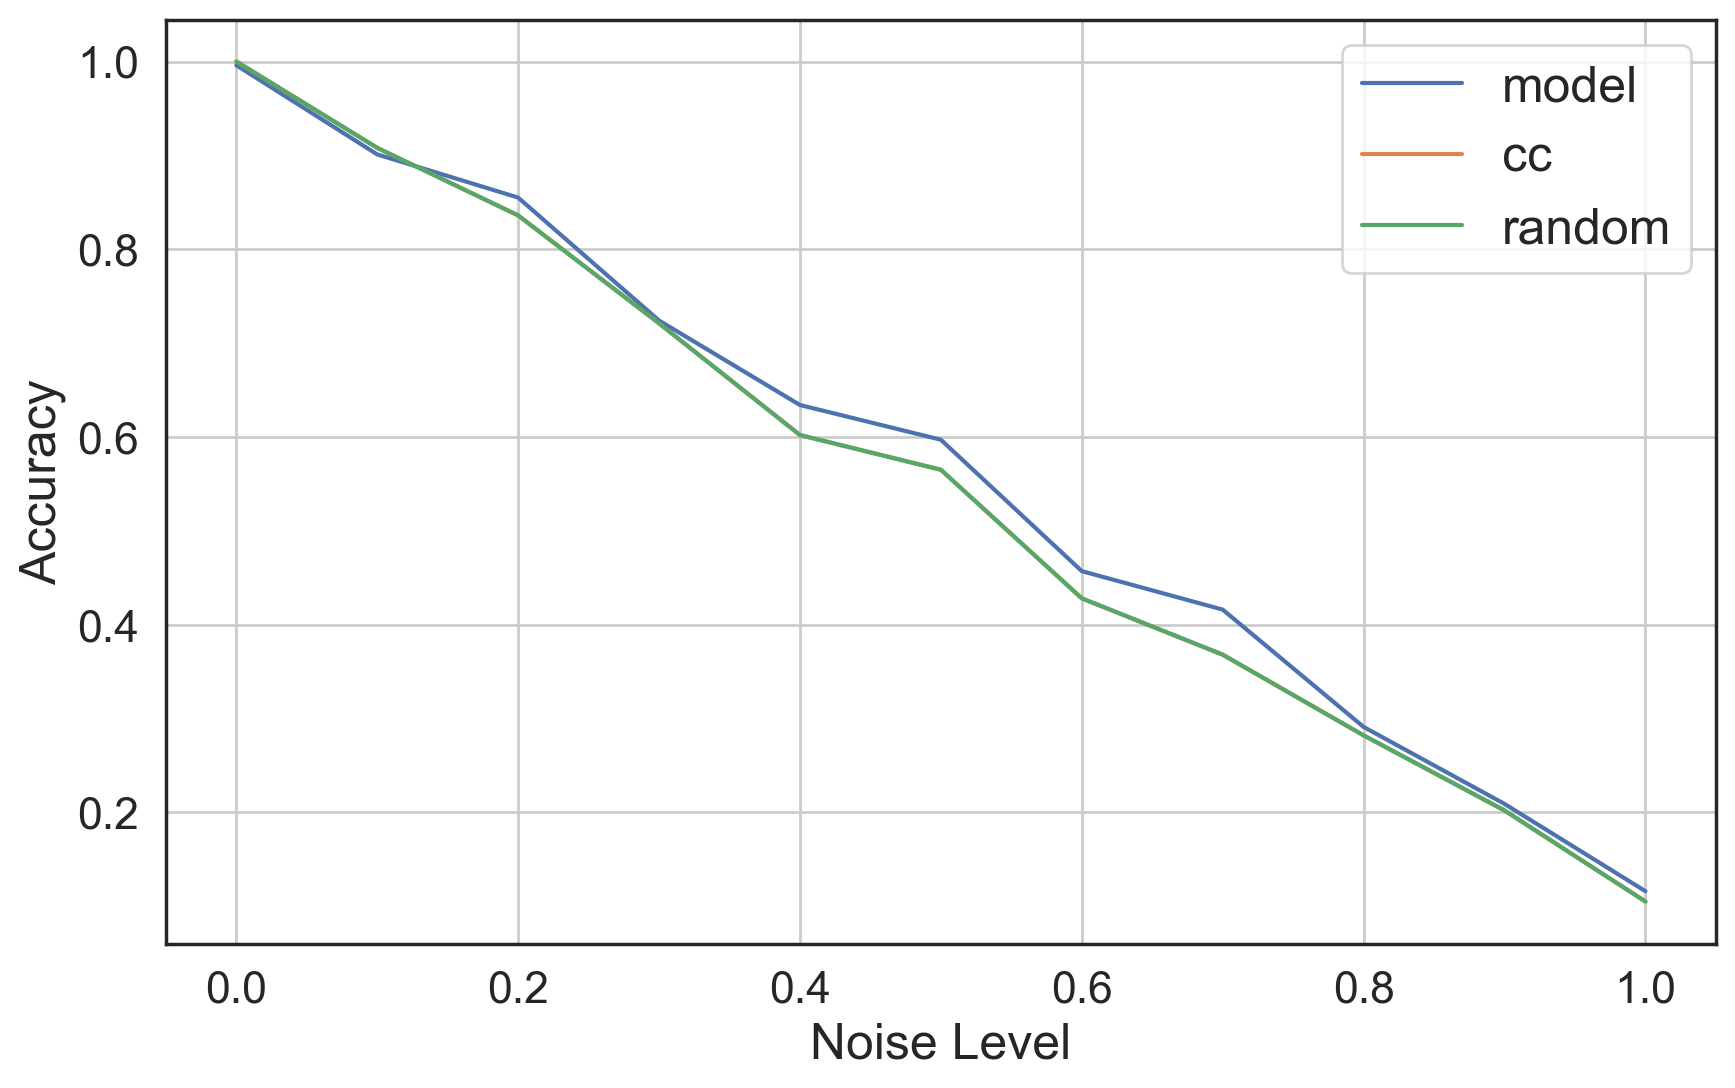

In [7]:
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Parameters for dataset generation
n_samples = 1000
n_clusters = 10
class_sep = 1

# Generate the dataset
X, Y = make_classification(
    n_samples=n_samples,
    n_features=10,
    n_informative=10,
    n_redundant=0,
    n_repeated=0,
    n_classes=n_clusters,
    n_clusters_per_class=1,
    flip_y=0.0,  # No noise initially
    class_sep=class_sep,
    hypercube=False,
    shuffle=True,
    random_state=13)

# Define gamma values
gamma_values = np.linspace(0, 1, 11)

# Placeholder for accuracies
accuracies_model1 = []
accuracies_model2 = []
accuracies_model3 = []

# Model definitions
model1 = MLPClassifier(random_state=13, max_iter=500)
# Assuming model2 is given and defined elsewhere

classes = np.unique(Y)
for gamma in gamma_values:
    # Introduce noise into labels
    Y_noisy = Y.copy()
    for i in range(len(Y)):
        if np.random.rand() < gamma:
            Y_noisy[i] = np.random.choice(classes)
    
    # Train models on the noisy dataset
    model1.fit(X, Y_noisy)
    
    # Make predictions
    predictions_model1 = model1.predict(X)
    predictions_model2 = cc_pred(model1, Y_noisy, X, use_model=False)
    
    # Calculate and store accuracy
    accuracies_model1.append(accuracy_score(Y, predictions_model1))
    accuracies_model2.append(accuracy_score(Y, predictions_model2))
    accuracies_model3.append(accuracy_score(Y, Y_noisy))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(gamma_values, accuracies_model1, label='model')
plt.plot(gamma_values, accuracies_model2, label='cc')
plt.plot(gamma_values, accuracies_model3, label='random')
plt.xlabel('Noise Level')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
def adjust_probabilities_by_ratio_correctly(prob, queried_labels, wrong_labels):
    N_pt, n_classes = prob.shape
    adjusted_prob = np.copy(prob).astype(float)
    
    for i in range(N_pt):
        for j in range(n_classes):
            if queried_labels[i, j] > 0 and wrong_labels[i, j] > 0:
                # Handle conflict by considering the proportion between queried and wrong labels
                proportion = queried_labels[i, j] / wrong_labels[i, j]
                adjusted_prob[i, j] *= proportion
            elif queried_labels[i, j] > 0:
                # If only queried labels are present, boost the probability
                adjusted_prob[i, j] *= (30 + queried_labels[i, j])
            elif wrong_labels[i, j] > 0:
                # If only wrong labels are present, reduce the probability
                adjusted_prob[i, j] *= (1 / (30 + wrong_labels[i, j]))
        
        # Normalize to ensure the probabilities sum to 1
        adjusted_prob[i, :] /= np.sum(adjusted_prob[i, :])
    
    return adjusted_prob

In [30]:
examples = [
    {"prob": [0.1, 0.2, 0.3, 0.2, 0.2], "queried": [0, 0, 5, 0, 0], "wrong": [0, 0, 0, 2, 1]},
    {"prob": [0.1, 0.2, 0.3, 0.2, 0.2], "queried": [1, 0, 0, 0, 0], "wrong": [0, 0, 0, 0, 0]},
    {"prob": [0.2, 0.2, 0.2, 0.2, 0.2], "queried": [0, 3, 0, 0, 0], "wrong": [0, 2, 0, 0, 0]},
    {"prob": [0.25, 0.25, 0.25, 0.15, 0.1], "queried": [2, 0, 1, 0, 0], "wrong": [0, 2, 0, 1, 1]},
    {"prob": [0.2, 0.2, 0.2, 0.2, 0.2], "queried": [1, 1, 1, 1, 1], "wrong": [2, 1, 1, 1, 1]},
    {"prob": [0.18, 0.22, 0.2, 0.2, 0.2], "queried": [0, 5, 0, 0, 0], "wrong": [3, 0, 3, 0, 2]}
]

# Prepare for adjusted probabilities calculation
adjusted_examples = []

for example in examples:
    prob = np.array([example["prob"]])
    queried = np.array([example["queried"]])
    wrong = np.array([example["wrong"]])
    adjusted = adjust_probabilities_by_ratio_correctly(prob, queried, wrong)
    adjusted_examples.append(adjusted[0])

# Display adjusted probabilities
adjusted_examples

[array([9.24838247e-03, 1.84967649e-02, 9.71080159e-01, 5.78023904e-04,
        5.96669836e-04]),
 array([0.775, 0.05 , 0.075, 0.05 , 0.05 ]),
 array([0.18181818, 0.27272727, 0.18181818, 0.18181818, 0.18181818]),
 array([5.07424991e-01, 4.95532218e-04, 4.91567960e-01, 3.06910277e-04,
        2.04606851e-04]),
 array([0.11111111, 0.22222222, 0.22222222, 0.22222222, 0.22222222]),
 array([6.88899626e-04, 9.72496639e-01, 7.65444029e-04, 2.52596530e-02,
        7.89364155e-04])]